In [1]:
!git clone https://github.com/swapniel99/ezio.git

Cloning into 'ezio'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 247 (delta 90), reused 133 (delta 30), pack-reused 0
Receiving objects: 100% (247/247), 1.11 MiB | 11.48 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [2]:
%cd ezio

/content/ezio


In [4]:
import torch
import torch.optim as optim
from tqdm import tqdm
import numpy as np

!pip install torchsummary
from torchsummary import summary

from ezio.data import dataset 
from ezio.data.data_transforms.session_9 import transformations
from ezio.runner import engine
from ezio.utils import loss

In [5]:
# !pip install albumentations==0.4.6
!pip install -U git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-bpbyfyhf
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-bpbyfyhf
     |████████████████████████████████| 952kB 4.5MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=69177 sha256=bc904d4cff371e0ad0fc8371d980a7f10276c697f17e5d577c9198e7d42e0fa4
  Stored in directory: /tmp/pip-ephem-wheel-cache-rf84ws_1/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [6]:
train_transforms = transformations.perform_transformations(train=True, is_numpy=True)
test_transforms = transformations.perform_transformations(train=False, is_numpy=True)

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [8]:
train_set, valid_set = dataset.cifar10_dataset(train_transforms, test_transforms)

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


In [9]:
train_loader, valid_loader = dataset.create_loaders(train_set, valid_set, train_batch_size=32, valid_batch_size=32, num_workers=4)

In [10]:
from ezio.model.session_9.model import ResNet18
model = ResNet18().to(device)

In [11]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.5)
loss_function = loss.cross_entropy_loss()

In [13]:
train_acc, train_losses, test_acc, test_losses = engine.fit(model, train_loader, valid_loader, loss_function, device, optimizer, 25, scheduler)

  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4985233545303345 Batch_id=1562 Accuracy=33.00: 100%|██████████| 1563/1563 [01:02<00:00, 24.89it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0461, Accuracy: 4608/10000 (46.08%)

EPOCH: 2


Loss=1.1738401651382446 Batch_id=1562 Accuracy=48.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.53it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0359, Accuracy: 5859/10000 (58.59%)

EPOCH: 3


Loss=1.4385547637939453 Batch_id=1562 Accuracy=56.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.54it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 6521/10000 (65.21%)

EPOCH: 4


Loss=1.317755937576294 Batch_id=1562 Accuracy=62.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.55it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0242, Accuracy: 7254/10000 (72.54%)

EPOCH: 5


Loss=1.5447297096252441 Batch_id=1562 Accuracy=67.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 7546/10000 (75.46%)

EPOCH: 6


Loss=1.1306884288787842 Batch_id=1562 Accuracy=69.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.43it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 7814/10000 (78.14%)

EPOCH: 7


Loss=0.7732406258583069 Batch_id=1562 Accuracy=71.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.50it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 7908/10000 (79.08%)

EPOCH: 8


Loss=0.49249178171157837 Batch_id=1562 Accuracy=73.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.46it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 8082/10000 (80.82%)

EPOCH: 9


Loss=0.4369053244590759 Batch_id=1562 Accuracy=75.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.52it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 7904/10000 (79.04%)

Epoch     9: reducing learning rate of group 0 to 5.0000e-03.
EPOCH: 10


Loss=0.5118995308876038 Batch_id=1562 Accuracy=78.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.49it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0139, Accuracy: 8493/10000 (84.93%)

EPOCH: 11


Loss=0.6112667918205261 Batch_id=1562 Accuracy=79.00: 100%|██████████| 1563/1563 [01:04<00:00, 24.36it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0146, Accuracy: 8431/10000 (84.31%)

Epoch    11: reducing learning rate of group 0 to 2.5000e-03.
EPOCH: 12


Loss=0.5099141001701355 Batch_id=1562 Accuracy=82.00: 100%|██████████| 1563/1563 [01:04<00:00, 24.37it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 8647/10000 (86.47%)

EPOCH: 13


Loss=0.41816210746765137 Batch_id=1562 Accuracy=83.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.45it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0127, Accuracy: 8654/10000 (86.54%)

Epoch    13: reducing learning rate of group 0 to 1.2500e-03.
EPOCH: 14


Loss=0.18296349048614502 Batch_id=1562 Accuracy=84.00: 100%|██████████| 1563/1563 [01:04<00:00, 24.40it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0119, Accuracy: 8733/10000 (87.33%)

EPOCH: 15


Loss=0.7439834475517273 Batch_id=1562 Accuracy=85.00: 100%|██████████| 1563/1563 [01:04<00:00, 24.23it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0119, Accuracy: 8727/10000 (87.27%)

EPOCH: 16


Loss=0.41284146904945374 Batch_id=1562 Accuracy=85.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.49it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 8727/10000 (87.27%)

Epoch    16: reducing learning rate of group 0 to 6.2500e-04.
EPOCH: 17


Loss=0.29797980189323425 Batch_id=1562 Accuracy=86.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.46it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 8755/10000 (87.55%)

EPOCH: 18


Loss=0.3916308879852295 Batch_id=1562 Accuracy=86.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.48it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 8755/10000 (87.55%)

Epoch    18: reducing learning rate of group 0 to 3.1250e-04.
EPOCH: 19


Loss=0.4647435247898102 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.45it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 8799/10000 (87.99%)

EPOCH: 20


Loss=0.5687035322189331 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.49it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 8782/10000 (87.82%)

Epoch    20: reducing learning rate of group 0 to 1.5625e-04.
EPOCH: 21


Loss=0.7261126041412354 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.51it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 8789/10000 (87.89%)

Epoch    21: reducing learning rate of group 0 to 7.8125e-05.
EPOCH: 22


Loss=0.10952094942331314 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.43it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 8813/10000 (88.13%)

EPOCH: 23


Loss=0.15834853053092957 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.45it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 8792/10000 (87.92%)

Epoch    23: reducing learning rate of group 0 to 3.9063e-05.
EPOCH: 24


Loss=0.3516409993171692 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 8809/10000 (88.09%)

EPOCH: 25


Loss=0.18088191747665405 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [01:03<00:00, 24.43it/s]



Test set: Average loss: 0.0115, Accuracy: 8821/10000 (88.21%)

Epoch    25: reducing learning rate of group 0 to 1.9531e-05.


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f194421b710>


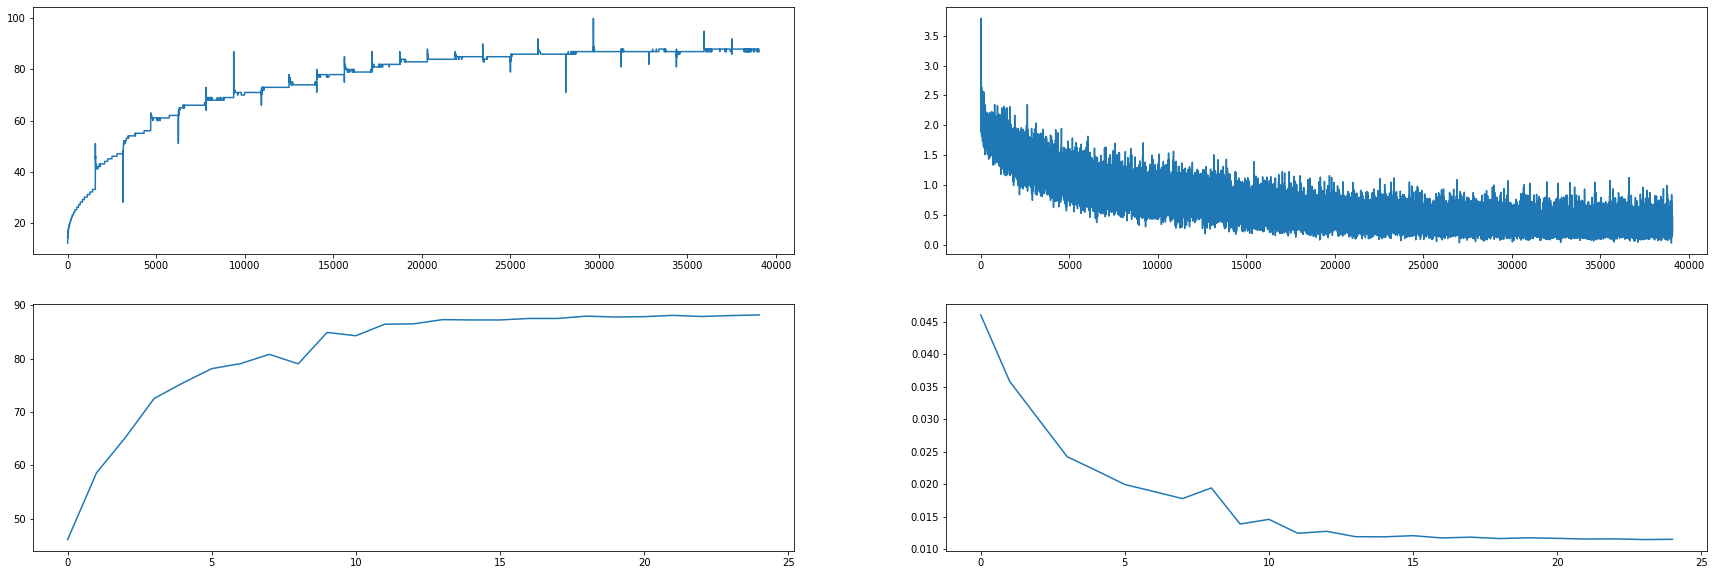

In [14]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(30,10))
print(axs)
axs[0][0].plot(train_acc, label = "train_acc")
axs[0][1].plot(train_losses, label = "train_losses")
axs[1][0].plot(test_acc, label = "test_acc")
axs[1][1].plot(test_losses, label = "test_losses")
# axs[0].legend()
# axs[0].set_title("Training Loss")

In [15]:
path = "sample_model.pth"
torch.save(model, path)

In [16]:
# Load the model
loaded_model = torch.load('sample_model.pth')

## GradCam Integration

In [21]:
from ezio.utils.gradcam.generate_images import gradcam_features, plot_grid

In [18]:
## Cifar-10 classes
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [19]:
## Sample images
images, target_classes = next(iter(valid_loader))

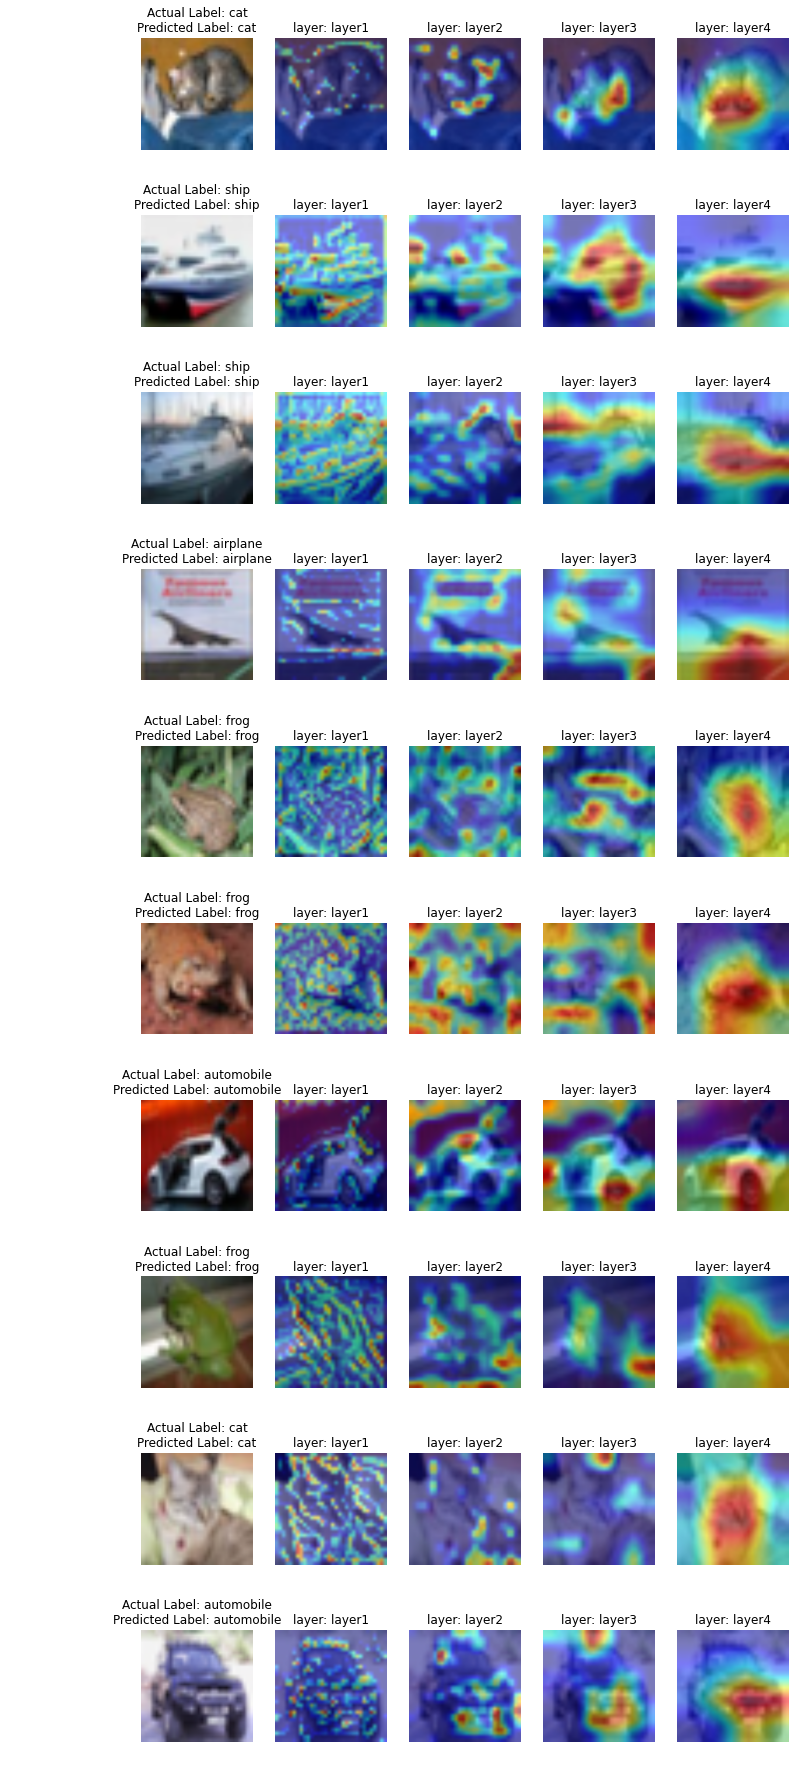

In [20]:
## Generate grid
target_layers = ["layer1", "layer2", "layer3", "layer4"]
predicted_probs, predicted_labels, gradcam_outputs = gradcam_features(loaded_model, target_layers, images[:10], target_classes[:10], device)
plot_grid(gradcam_outputs, images[:10], target_classes[:10], predicted_labels, class_names, (3, 32, 32))